### 1.机器学习基础操作线性模型

- 数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件。

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"./data/bike.csv")

- id属性对构建回归预测模型没有帮助，请剔除掉该列。

In [2]:
data = data.drop('id',axis=1)#去除id列

- 我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。

In [3]:
data = data[data['city']==1]#筛选出上海的数据
data = data.drop('city',axis=1)#删除city列

- 为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。

In [4]:
#这里变为0的在前，否则不能正确转换
data.loc[(data['hour']<=5)|(data['hour']>=19),'hour']=0
data.loc[(data['hour']>=6)&(data['hour']<=18),'hour']=1

- y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。

In [5]:
y = np.array(data['y'])
y = y.astype(np.float64)
data = data.drop('y',axis=1)

- 请将DataFrame对象转换为Numpy数组，方便后续操作。

In [6]:
x = np.array(data)

- 请按照训练集与测试集8:2的比例将原始数据集划分。

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=np.random.randint(1,100000000))

- 请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_test=min_max_scaler.fit_transform(x_test)
x_train=min_max_scaler.fit_transform(x_train)

#由于MinMaxScaler只能对二维数组归一化，所以自己写一个向量归一化函数
def MinMaxVec(datas):#对向量归一化
    maxs=datas.max()
    mins=datas.min()
    for i in range(len(datas)):
        datas[i]=(datas[i]-mins)/(maxs-mins)
MinMaxVec(y_test)
MinMaxVec(y_train)

- 请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。

In [9]:
from sklearn.linear_model import LinearRegression
mode = LinearRegression()
mode.fit(x_train,y_train)#模型训练

LinearRegression()

- 利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。

In [10]:
#将测试集传入，得到预测值
predict = mode.predict(x_test)
predict

array([ 1.50572273e-01,  1.05354377e-01,  2.40793996e-02,  3.41331715e-01,
        1.49191768e-01,  6.13722737e-02,  1.41092857e-01,  2.90044855e-01,
        2.09150266e-01,  1.86353170e-01,  2.47721352e-01,  2.70509103e-01,
        1.70006351e-01,  3.67518409e-02,  3.28772388e-01, -1.90251519e-04,
        4.14222391e-02,  1.64801311e-01,  3.44322756e-02,  4.80777224e-01,
        2.93038729e-01,  1.70254838e-01,  2.72036523e-01,  1.29359373e-01,
        4.07888870e-01,  1.98960119e-01,  3.62833159e-02,  2.40172199e-01,
        1.00244430e-02,  4.05180004e-01,  1.85292278e-01,  2.33202687e-01,
        3.81140914e-02,  1.25206933e-01,  2.64240970e-01,  4.42864195e-01,
        7.53256423e-02,  3.00922209e-02,  9.99928269e-04,  1.56335983e-01,
        4.85859809e-01,  4.50103267e-01,  4.10329386e-02,  2.33422101e-01,
        8.23994599e-02,  1.31402748e-01,  1.86292202e-01,  4.48690057e-02,
        1.68695622e-01,  3.20433715e-01,  3.33936406e-02,  2.79775918e-01,
        2.39172274e-01, -

- 模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

In [11]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predict))
print("RMSE为:{}".format(RMSE))

RMSE为:0.17687606956576735


### 利用K近邻算法学习鸢尾花数据集

- 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42

In [12]:
from sklearn import datasets
#加载数据
iris_data = datasets.load_iris()
x = iris_data.data
y=iris_data.target
#划分数据
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)
#iris_data.target
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- 以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图

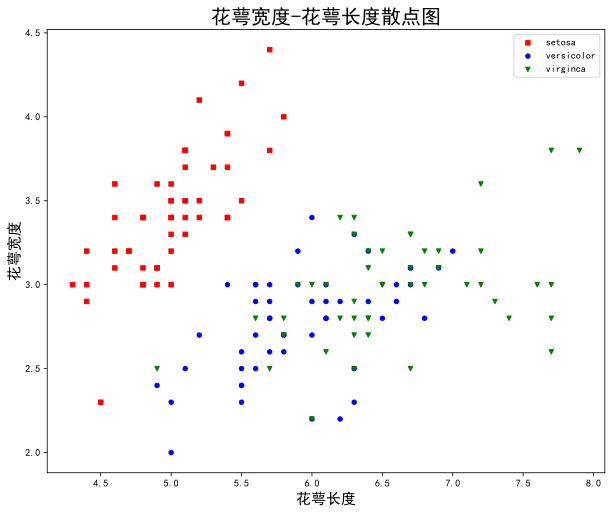

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
iris = pd.DataFrame(iris_data.data,columns=['sepal length','sepal width','petal length','petal width'])
#这个数据集每种花有50组数据
plt.figure(figsize=(10,8))
plt.title("花萼宽度-花萼长度散点图",fontsize=20)
plt.xlabel("花萼长度",fontsize=15)
plt.ylabel("花萼宽度",fontsize=15)
#ax=iris.iloc[:50].plot.scatter('sepal length','sepal width',s=20,marker='s',c='red',label='setosa')
plt.scatter(iris.iloc[:50]['sepal length'],iris.iloc[:50]['sepal width'],s=20,marker='s',c='red',label='setosa')
#iris.iloc[50:100].plot.scatter('sepal length',"sepal width",s=20,marker='o',c='pink',label='versicolor',ax=ax)
plt.scatter(iris.iloc[50:100]['sepal length'],iris.iloc[50:100]['sepal width'],s=20,marker='o',c='blue',label='versicolor')
#iris.iloc[100:].plot.scatter('sepal length',"sepal width",s=20,marker='v',c='skyblue',label='virginca',ax=ax)
plt.scatter(iris.iloc[100:]['sepal length'],iris.iloc[100:]['sepal width'],s=20,marker='v',c='green',label='virginca')
plt.legend()
plt.show()

- 对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2

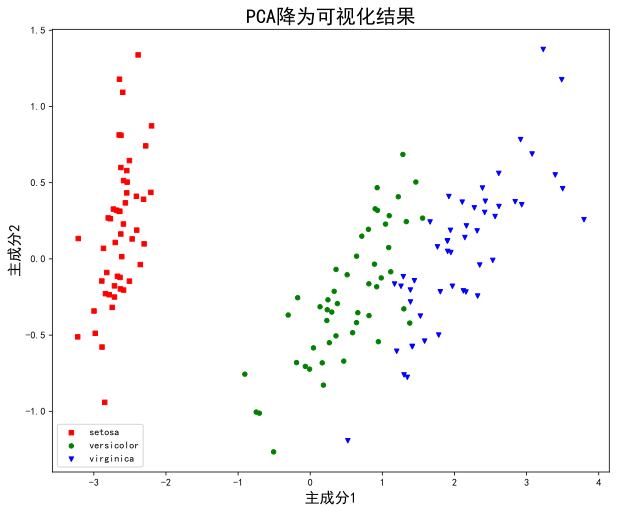

In [14]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris_data.data)
iris_decom = pca.transform(iris_data.data)
x_test = pca.transform(x_test)
x_train = pca.transform(x_train)
labels = ['setosa', 'versicolor', 'virginica']
markers = ['s','o','v']
colors = ['r','g','b']
plt.figure(figsize=(10,8))
plt.title("PCA降为可视化结果",fontsize=20)
plt.xlabel("主成分1",fontsize=15)
plt.ylabel("主成分2",fontsize=15)
for i in range(150):
    if i%50==0:
        plt.scatter(iris_decom[i][0],iris_decom[i][1],label=labels[i//50],s=20,c=colors[i//50],marker=markers[i//50])
    else:
        plt.scatter(iris_decom[i][0],iris_decom[i][1],s=20,c=colors[i//50],marker=markers[i//50])
plt.legend()
plt.show()

- 以K=3训练分类器

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X=x_train,y=y_train)

KNeighborsClassifier(n_neighbors=3)

- 在测试集上进行测试，最后输出分类准确率

In [16]:
y_predict = knn.predict(x_test)
#y_predict=y_predict.reshape(-1,1)
print("分类结果：\n",y_predict)
print("准确率：{}".format(knn.score(x_test,y_test)))

分类结果：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 1 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 2 2 2 1 0 0 2 2 0 0 0 2 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1]
准确率：0.9666666666666667
